<a href="https://colab.research.google.com/github/anikethk28/aniketh201/blob/main/DPS_GNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow_privacy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.1/140.1 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 70.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 5.5 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of opencv-python-headless to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 405.4/405.4 kB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━

KeyboardInterrupt: 

In [ ]:
!pip install spektral

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.1/140.1 kB 14.8 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import categorical_accuracy
from tensorflow.keras.optimizers import Adam
from spektral.data import DisjointLoader
from spektral.datasets import TUDataset
from spektral.models import GeneralGNN
from google.colab import files
physical_devices = tf.config.list_physical_devices("GPU")
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [ ]:
# Configuration parameters for federated learning
client_batch_sz = 40
optimizer_lr = 0.001
training_iterations = 5
client_training_rounds = training_iterations
server_aggregation_cycles = 20

In [ ]:
!pip install --upgrade spektral
!pip install scikit-learn==1.2.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 68.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-learn: filename=scikit_learn-1.2.2-cp312-cp312-linux_x86_64.whl size=9458733 sha256=700f753198fce257d0c558ac556c23d3faa13135d8f0537318bb88b3ab5bdcaf
  Stored in directory: /root/.cache/pip/wheels/24/f8/77/ae90c181b806f450a6fec8c8f794594e7c92fa79d7ca27e656
Successfully built scikit-learn
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cuml-cu12 25.10.0 requires scikit-learn>=1.4, but you have scikit-learn 1.2.2 which is incompatible.
spopt 0.7.0 require

In [ ]:
# Uninstall conflicting packages
!pip uninstall -y numpy scikit-learn spektral scipy

# Install compatible versions for Python 3.12
!pip install numpy>=1.26.0 scikit-learn>=1.3.0 scipy>=1.11.0

# Reinstall spektral
!pip install spektral

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
Found existing installation: spektral 1.3.1
Uninstalling spektral-1.3.1:
  Successfully uninstalled spektral-1.3.1
Found existing installation: scipy 1.16.3
Uninstalling scipy-1.16.3:
  Successfully uninstalled scipy-1.16.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.3.5 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.5 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.5 which is incompatible.
tensorflow 2.19.0

In [ ]:
# Apply monkey patch to Spektral's TUDataset module
import spektral.datasets.tudataset as tudataset_module
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

def custom_normalization_handler(features, normalization_type):
    """Custom normalization function using sparse_output parameter"""
    if normalization_type == "ohe":
        normalizer = OneHotEncoder(sparse_output=False, categories="auto")
    elif normalization_type == "zscore":
        normalizer = StandardScaler()
    elif normalization_type == "minmax":
        normalizer = MinMaxScaler()
    else:
        return features
    return normalizer.fit_transform(features)

# Override the original normalization function
tudataset_module._normalize = custom_normalization_handler

# Import dependencies after patching
from spektral.datasets import TUDataset
import numpy as np
from spektral.data import DisjointLoader

# Dataset configuration
dataset_name = "Tox21_HSE_training"
train_test_ratio = 0.8

# Function to load and split dataset
def prepare_dataset_loaders(dataset_identifier, split_ratio, batch_sz, num_epochs):
    """Prepare training and testing loaders for a dataset"""
    dataset = TUDataset(dataset_identifier)
    np.random.shuffle(dataset)

    split_index = int(split_ratio * len(dataset))
    train_subset, test_subset = dataset[:split_index], dataset[split_index:]

    train_loader = DisjointLoader(train_subset, batch_size=batch_sz, epochs=num_epochs)
    test_loader = DisjointLoader(test_subset, batch_size=batch_sz)

    return train_loader, test_loader

# Create three independent dataset instances
loader_tr1, loader_te1 = prepare_dataset_loaders(
    dataset_name, train_test_ratio, client_batch_sz, training_iterations
)

loader_tr2, loader_te2 = prepare_dataset_loaders(
    dataset_name, train_test_ratio, client_batch_sz, training_iterations
)

loader_tr3, loader_te3 = prepare_dataset_loaders(
    dataset_name, train_test_ratio, client_batch_sz, training_iterations
)

100%|█████████████████████████████████████████| 897k/897k [00:00<00:00, 984kB/s]


Successfully loaded Tox21_HSE_training.


/tmp/ipython-input-17306783.py:33: UserWarning: you are shuffling a 'TUDataset' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(dataset)


Successfully loaded Tox21_HSE_training.


/tmp/ipython-input-17306783.py:33: UserWarning: you are shuffling a 'TUDataset' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(dataset)


Successfully loaded Tox21_HSE_training.


/tmp/ipython-input-17306783.py:33: UserWarning: you are shuffling a 'TUDataset' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(dataset)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
dataset_name = "Tox21_HSE_training"
dataset = TUDataset(dataset_name)
print(f"Dataset: {dataset_name}")
print(f"Total number of graphs: {len(dataset)}")
print(f"Number of node features: {dataset.n_node_features}")
print(f"Number of edge features: {dataset.n_edge_features}")
print(f"Number of graph labels: {dataset.n_labels}")


Successfully loaded Tox21_HSE_training.
Dataset: Tox21_HSE_training
Total number of graphs: 8150
Number of node features: 48
Number of edge features: 4
Number of graph labels: 2


In [ ]:
print("=" * 60)
print("BASIC DATASET STATISTICS")
print("=" * 60)

num_nodes = [g.n_nodes for g in dataset]
num_edges = [g.n_edges for g in dataset]
labels = [g.y[0] for g in dataset]

stats = {
    'Metric': ['Graphs', 'Avg Nodes', 'Avg Edges', 'Min Nodes', 'Max Nodes',
               'Min Edges', 'Max Edges', 'Total Nodes', 'Total Edges'],
    'Value': [
        len(dataset),
        f"{np.mean(num_nodes):.2f}",
        f"{np.mean(num_edges):.2f}",
        np.min(num_nodes),
        np.max(num_nodes),
        np.min(num_edges),
        np.max(num_edges),
        np.sum(num_nodes),
        np.sum(num_edges)
    ]
}

df_stats = pd.DataFrame(stats)
print(df_stats.to_string(index=False))

BASIC DATASET STATISTICS
     Metric  Value
     Graphs   8150
  Avg Nodes  16.72
  Avg Edges  34.07
  Min Nodes      2
  Max Nodes    103
  Min Edges      0
  Max Edges    214
Total Nodes 136240
Total Edges 277682


In [ ]:
print("\n" )
print("CLASS DISTRIBUTION")
print("\n")

label_counts = Counter(labels)
print(f"\nUnique classes: {len(label_counts)}")
for label, count in sorted(label_counts.items()):
    percentage = (count / len(dataset)) * 100
    print(f"Class {label}: {count} graphs ({percentage:.2f}%)")






CLASS DISTRIBUTION



Unique classes: 2
Class 0.0: 428 graphs (5.25%)
Class 1.0: 7722 graphs (94.75%)


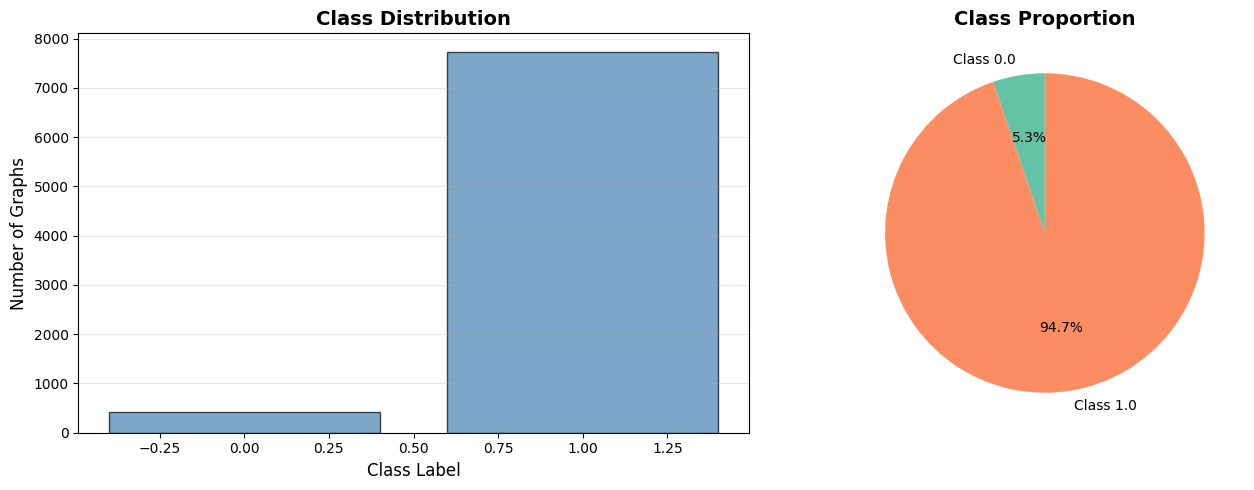

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
classes, counts = zip(*sorted(label_counts.items()))
ax1.bar(classes, counts, color='steelblue', alpha=0.7, edgecolor='black')
ax1.set_xlabel('Class Label', fontsize=12)
ax1.set_ylabel('Number of Graphs', fontsize=12)
ax1.set_title('Class Distribution', fontsize=14, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Pie chart
ax2.pie(counts, labels=[f'Class {c}' for c in classes], autopct='%1.1f%%',
        startangle=90, colors=sns.color_palette("Set2"))
ax2.set_title('Class Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

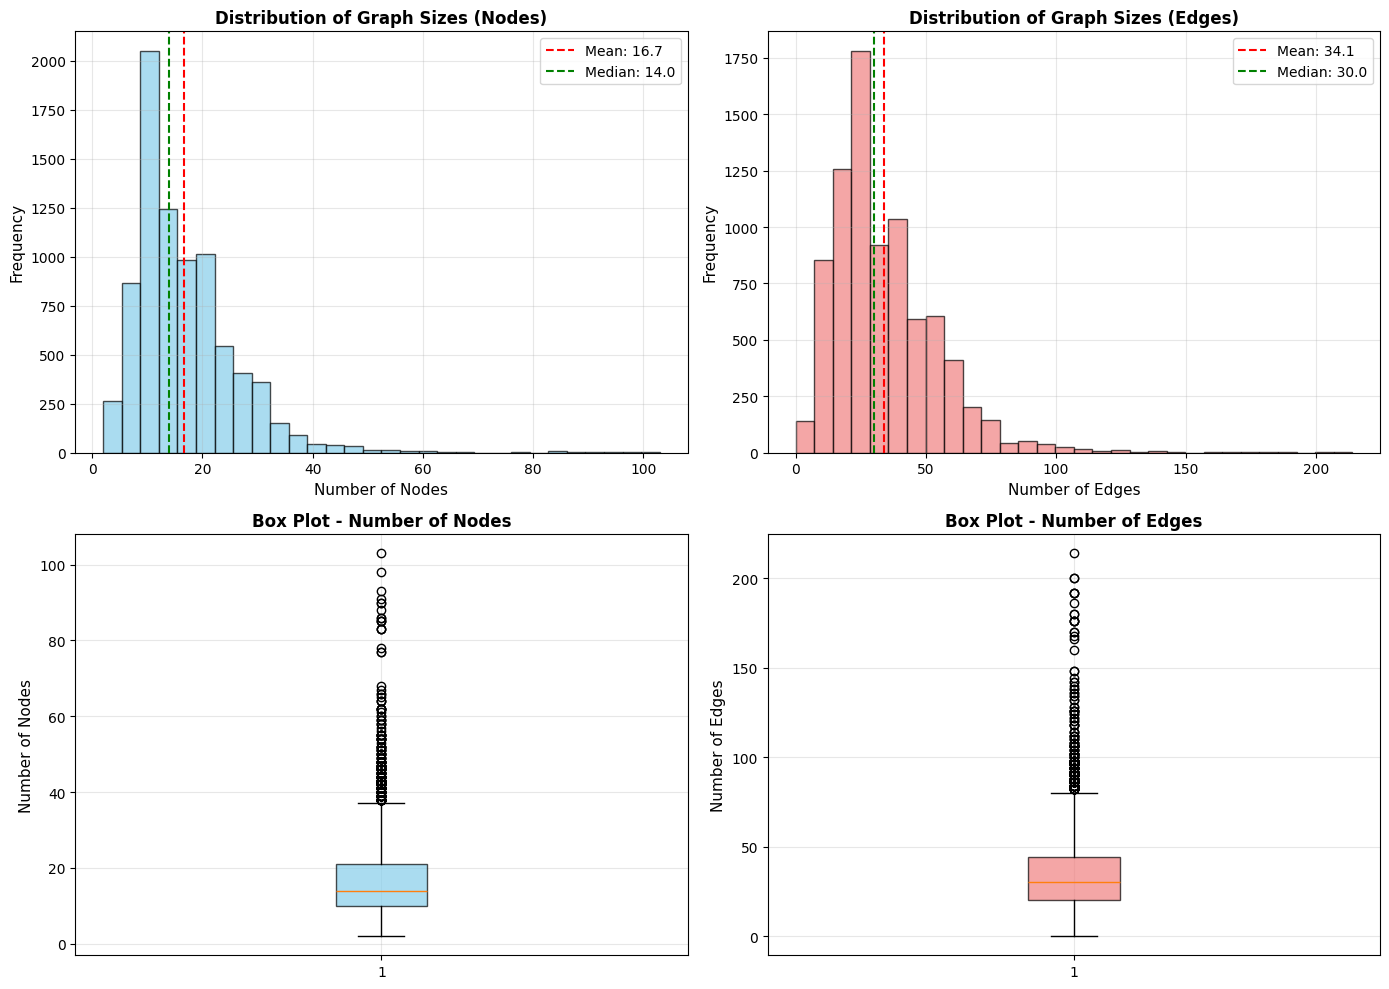

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Number of nodes histogram
axes[0, 0].hist(num_nodes, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(np.mean(num_nodes), color='red', linestyle='--',
                    label=f'Mean: {np.mean(num_nodes):.1f}')
axes[0, 0].axvline(np.median(num_nodes), color='green', linestyle='--',
                    label=f'Median: {np.median(num_nodes):.1f}')
axes[0, 0].set_xlabel('Number of Nodes', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].set_title('Distribution of Graph Sizes (Nodes)', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Number of edges histogram
axes[0, 1].hist(num_edges, bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
axes[0, 1].axvline(np.mean(num_edges), color='red', linestyle='--',
                    label=f'Mean: {np.mean(num_edges):.1f}')
axes[0, 1].axvline(np.median(num_edges), color='green', linestyle='--',
                    label=f'Median: {np.median(num_edges):.1f}')
axes[0, 1].set_xlabel('Number of Edges', fontsize=11)
axes[0, 1].set_ylabel('Frequency', fontsize=11)
axes[0, 1].set_title('Distribution of Graph Sizes (Edges)', fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Box plot for nodes
axes[1, 0].boxplot(num_nodes, vert=True, patch_artist=True,
                    boxprops=dict(facecolor='skyblue', alpha=0.7))
axes[1, 0].set_ylabel('Number of Nodes', fontsize=11)
axes[1, 0].set_title('Box Plot - Number of Nodes', fontsize=12, fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# Box plot for edges
axes[1, 1].boxplot(num_edges, vert=True, patch_artist=True,
                    boxprops=dict(facecolor='lightcoral', alpha=0.7))
axes[1, 1].set_ylabel('Number of Edges', fontsize=11)
axes[1, 1].set_title('Box Plot - Number of Edges', fontsize=12, fontweight='bold')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

GRAPH DENSITY STATISTICS
Average density: 0.3325
Median density: 0.3000
Min density: 0.0000
Max density: 2.0000
Std density: 0.1822


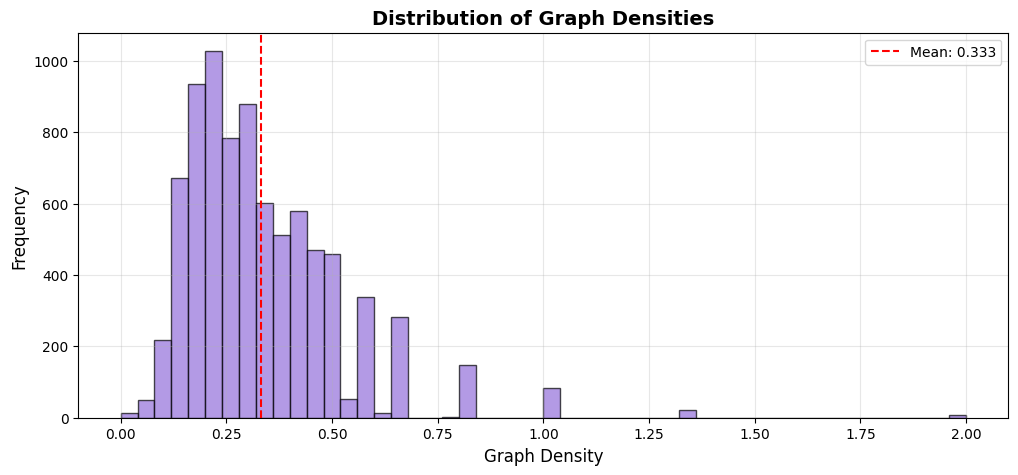

In [ ]:
densities = []
for g in dataset:
    n = g.n_nodes
    e = g.n_edges
    max_edges = n * (n - 1) / 2
    density = e / max_edges if max_edges > 0 else 0
    densities.append(density)

print("=" * 60)
print("GRAPH DENSITY STATISTICS")
print("=" * 60)
print(f"Average density: {np.mean(densities):.4f}")
print(f"Median density: {np.median(densities):.4f}")
print(f"Min density: {np.min(densities):.4f}")
print(f"Max density: {np.max(densities):.4f}")
print(f"Std density: {np.std(densities):.4f}")

plt.figure(figsize=(12, 5))
plt.hist(densities, bins=50, color='mediumpurple', edgecolor='black', alpha=0.7)
plt.axvline(np.mean(densities), color='red', linestyle='--',
            label=f'Mean: {np.mean(densities):.3f}')
plt.xlabel('Graph Density', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Graph Densities', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

NODE DEGREE STATISTICS
Average degree: 2.04
Median degree: 2.00
Min degree: 0
Max degree: 6
Std degree: 0.81


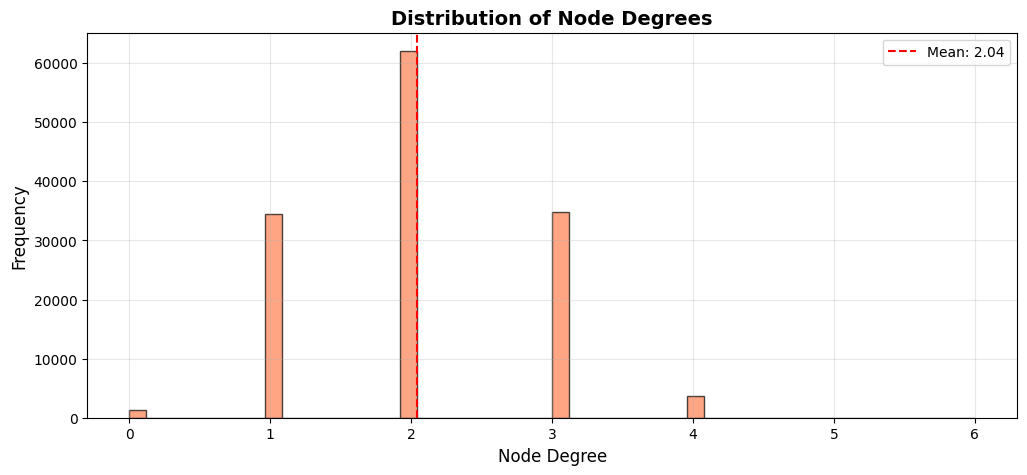

In [ ]:
all_degrees = []
for g in dataset:
    adj_matrix = g.a.toarray() if hasattr(g.a, 'toarray') else g.a
    degrees = np.sum(adj_matrix, axis=1)
    all_degrees.extend(degrees)

print("=" * 60)
print("NODE DEGREE STATISTICS")
print("=" * 60)
print(f"Average degree: {np.mean(all_degrees):.2f}")
print(f"Median degree: {np.median(all_degrees):.2f}")
print(f"Min degree: {np.min(all_degrees):.0f}")
print(f"Max degree: {np.max(all_degrees):.0f}")
print(f"Std degree: {np.std(all_degrees):.2f}")

plt.figure(figsize=(12, 5))
plt.hist(all_degrees, bins=50, color='coral', edgecolor='black', alpha=0.7)
plt.axvline(np.mean(all_degrees), color='red', linestyle='--',
            label=f'Mean: {np.mean(all_degrees):.2f}')
plt.xlabel('Node Degree', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Node Degrees', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

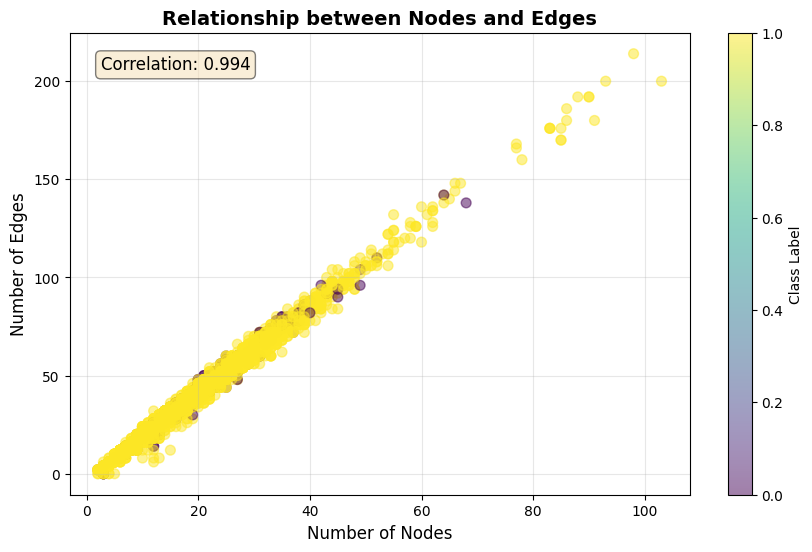

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(num_nodes, num_edges, alpha=0.5, c=labels, cmap='viridis', s=50)
plt.colorbar(label='Class Label')
plt.xlabel('Number of Nodes', fontsize=12)
plt.ylabel('Number of Edges', fontsize=12)
plt.title('Relationship between Nodes and Edges', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)

# Add correlation coefficient
corr = np.corrcoef(num_nodes, num_edges)[0, 1]
plt.text(0.05, 0.95, f'Correlation: {corr:.3f}',
         transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.show()


In [ ]:
print("\n")
print("SAMPLE GRAPH INSPECTION")
print("\n")

sample_idx = 0
sample_graph = dataset[sample_idx]

print(f"\nGraph {sample_idx} Details:")
print(f"  Nodes: {sample_graph.n_nodes}")
print(f"  Edges: {sample_graph.n_edges}")
print(f"  Node features shape: {sample_graph.x.shape}")
print(f"  Adjacency matrix shape: {sample_graph.a.shape}")
print(f"  Label: {sample_graph.y}")

if hasattr(sample_graph, 'e') and sample_graph.e is not None:
    print(f"  Edge features shape: {sample_graph.e.shape}")

# Cell 14: Feature statistics
print("\n")
print("NODE FEATURE STATISTICS")
print("\n" )

all_features = np.vstack([g.x for g in dataset])
print(f"\nTotal feature matrix shape: {all_features.shape}")
print(f"\nPer-feature statistics:")

for i in range(min(5, all_features.shape[1])):  # Show first 5 features
    feat = all_features[:, i]
    print(f"\nFeature {i}:")
    print(f"  Mean: {np.mean(feat):.4f}")
    print(f"  Std: {np.std(feat):.4f}")
    print(f"  Min: {np.min(feat):.4f}")
    print(f"  Max: {np.max(feat):.4f}")
    print(f"  Unique values: {len(np.unique(feat))}")



SAMPLE GRAPH INSPECTION



Graph 0 Details:
  Nodes: 34
  Edges: 74
  Node features shape: (34, 48)
  Adjacency matrix shape: (34, 34)
  Label: [1. 0.]
  Edge features shape: (74, 4)


NODE FEATURE STATISTICS



Total feature matrix shape: (136240, 48)

Per-feature statistics:

Feature 0:
  Mean: 0.1521
  Std: 0.3591
  Min: 0.0000
  Max: 1.0000
  Unique values: 2

Feature 1:
  Mean: 0.7182
  Std: 0.4499
  Min: 0.0000
  Max: 1.0000
  Unique values: 2

Feature 2:
  Mean: 0.0721
  Std: 0.2587
  Min: 0.0000
  Max: 1.0000
  Unique values: 2

Feature 3:
  Mean: 0.0114
  Std: 0.1062
  Min: 0.0000
  Max: 1.0000
  Unique values: 2

Feature 4:
  Mean: 0.0215
  Std: 0.1450
  Min: 0.0000
  Max: 1.0000
  Unique values: 2


In [ ]:
# Re-install scikit-learn to a compatible version
!pip install scikit-learn==1.6.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 126.9 MB/s eta 0:00:00


Successfully loaded PROTEINS.
Successfully loaded DD.


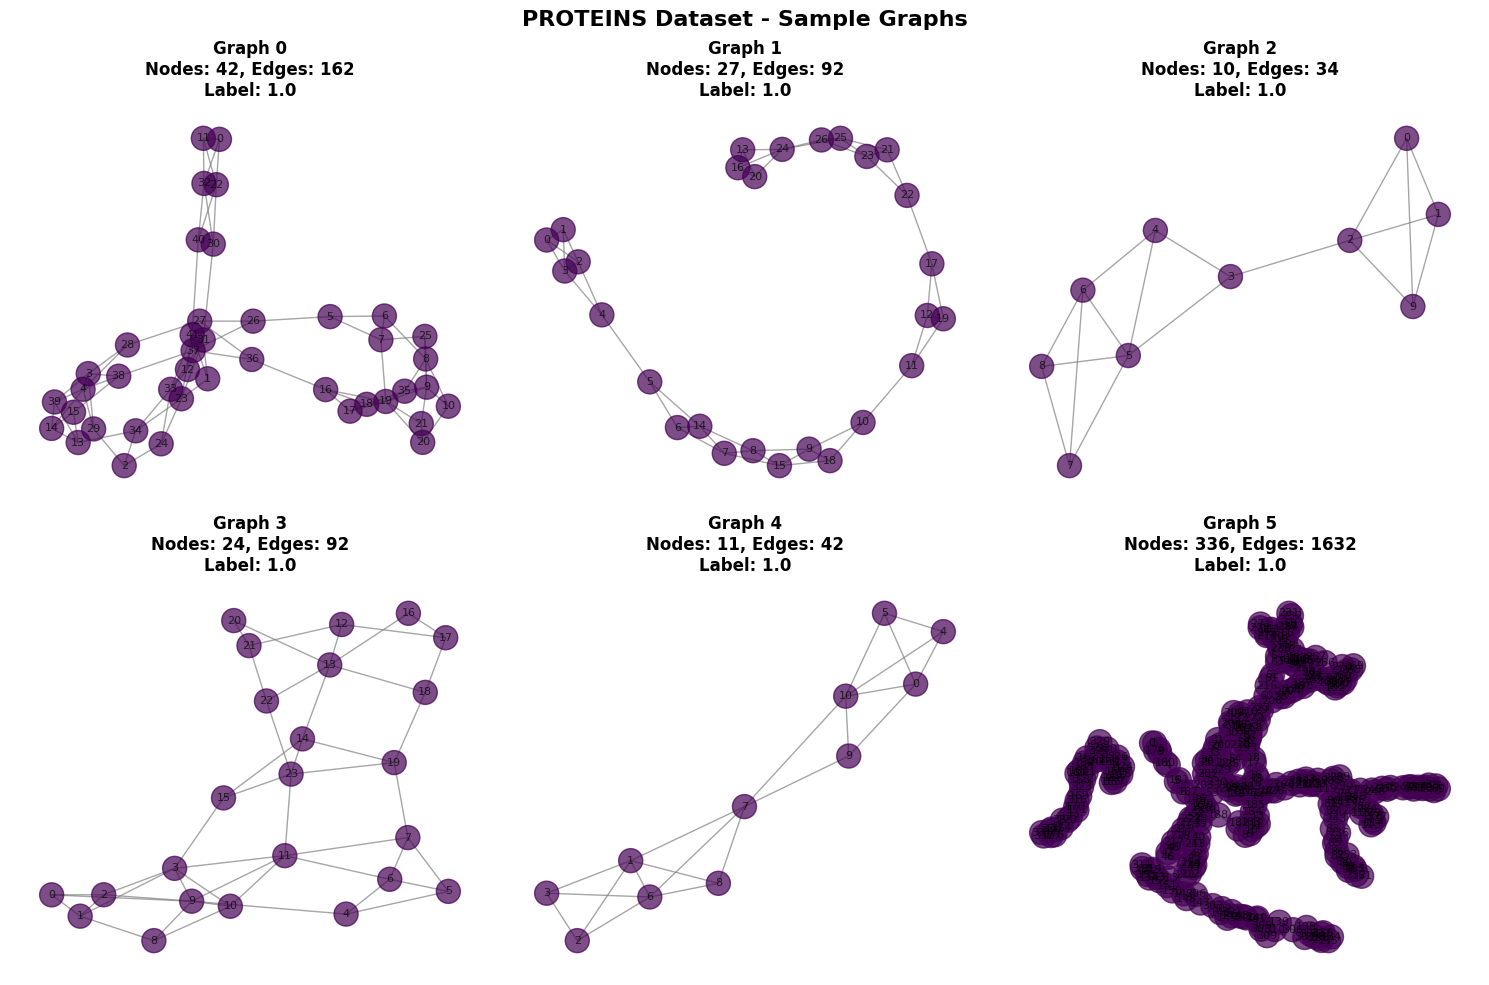

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from spektral.datasets import TUDataset
import numpy as np

# Load datasets
proteins_data = TUDataset("PROTEINS")
dd_data = TUDataset("DD")

def plot_graph(graph, title, ax):
    """Plot a single graph using NetworkX"""
    # Create NetworkX graph
    G = nx.Graph()

    # Add nodes
    n_nodes = graph.n_nodes
    G.add_nodes_from(range(n_nodes))

    # Add edges from adjacency matrix
    adj = graph.a
    edges = np.argwhere(adj > 0)
    G.add_edges_from(edges.tolist())

    # Node colors based on node features (if available)
    if graph.x is not None and len(graph.x.shape) > 1:
        node_colors = np.argmax(graph.x, axis=1) if graph.x.shape[1] > 1 else graph.x[:, 0]
    else:
        node_colors = 'lightblue'

    # Draw graph
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos,
            node_color=node_colors,
            node_size=300,
            with_labels=True,
            font_size=8,
            edge_color='gray',
            alpha=0.7,
            ax=ax,
            cmap='viridis')

    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.axis('off')

# Plot PROTEINS dataset examples
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('PROTEINS Dataset - Sample Graphs', fontsize=16, fontweight='bold')

for i in range(6):
    row = i // 3
    col = i % 3
    graph = proteins_data[i]
    label = graph.y[0] if hasattr(graph, 'y') and graph.y is not None else 'N/A'
    plot_graph(graph,
               f'Graph {i}\nNodes: {graph.n_nodes}, Edges: {graph.n_edges}\nLabel: {label}',
               axes[row, col])

plt.tight_layout()
plt.savefig('proteins_graphs.png', dpi=300, bbox_inches='tight')
plt.show()

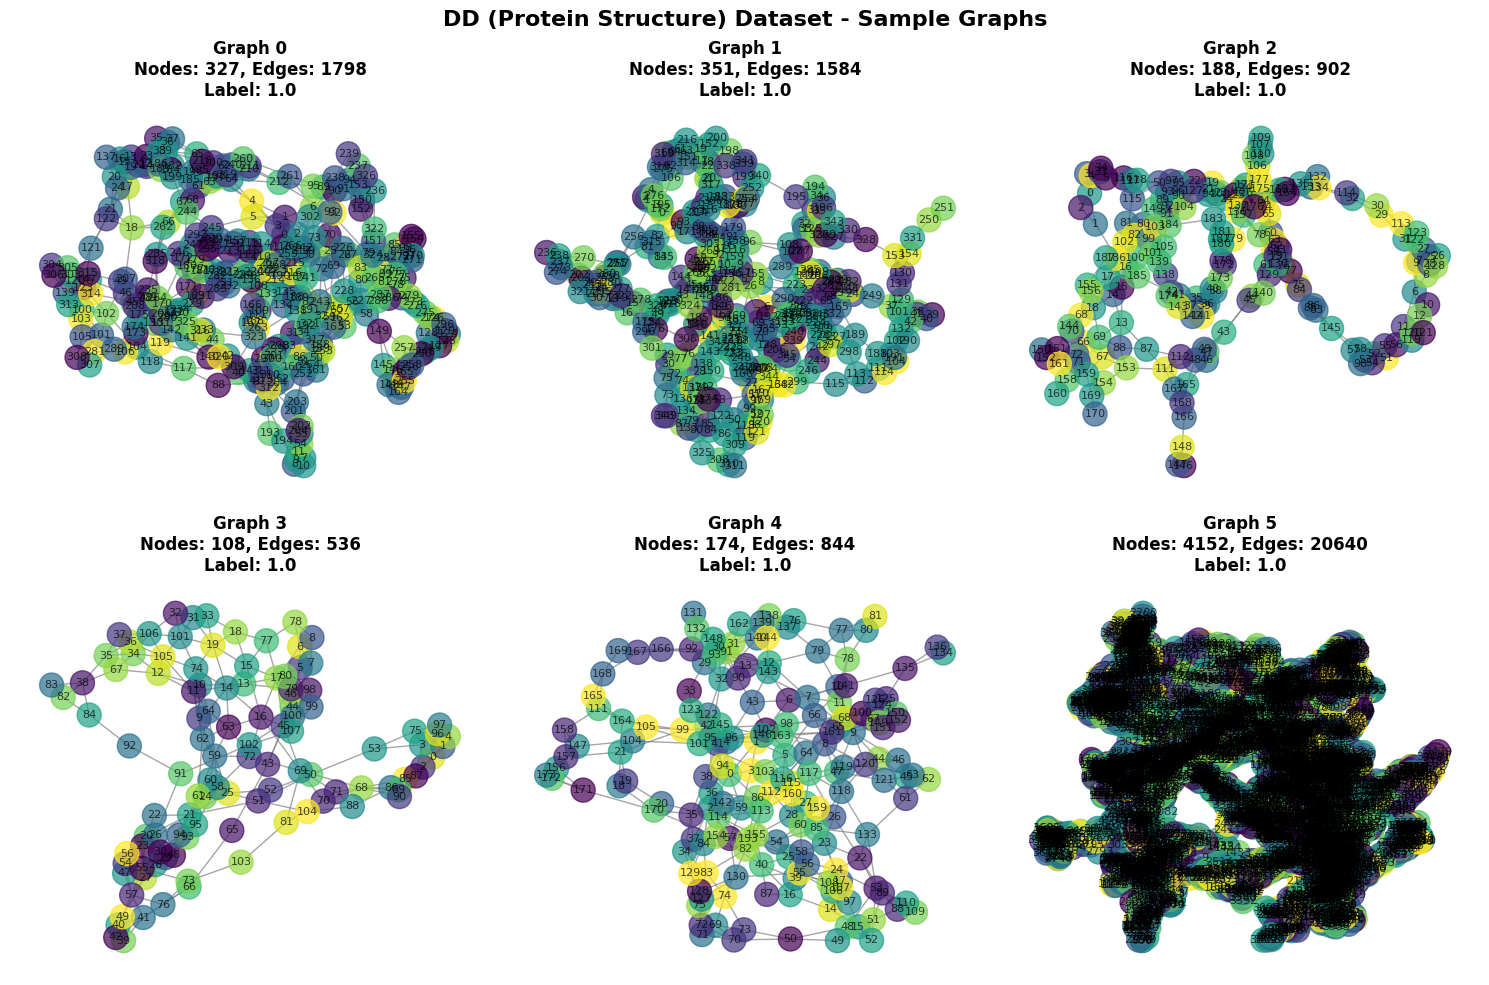

In [ ]:
# Plot DD dataset examples
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('DD (Protein Structure) Dataset - Sample Graphs', fontsize=16, fontweight='bold')

for i in range(6):
    row = i // 3
    col = i % 3
    graph = dd_data[i]
    label = graph.y[0] if hasattr(graph, 'y') and graph.y is not None else 'N/A'
    plot_graph(graph,
               f'Graph {i}\nNodes: {graph.n_nodes}, Edges: {graph.n_edges}\nLabel: {label}',
               axes[row, col])

plt.tight_layout()
plt.savefig('dd_graphs.png', dpi=300, bbox_inches='tight')
plt.show()


DD Dataset Statistics
Number of graphs: 1178
Average nodes per graph: 284.32
Average edges per graph: 1431.32
Node feature dimension: 82
Number of classes: 2


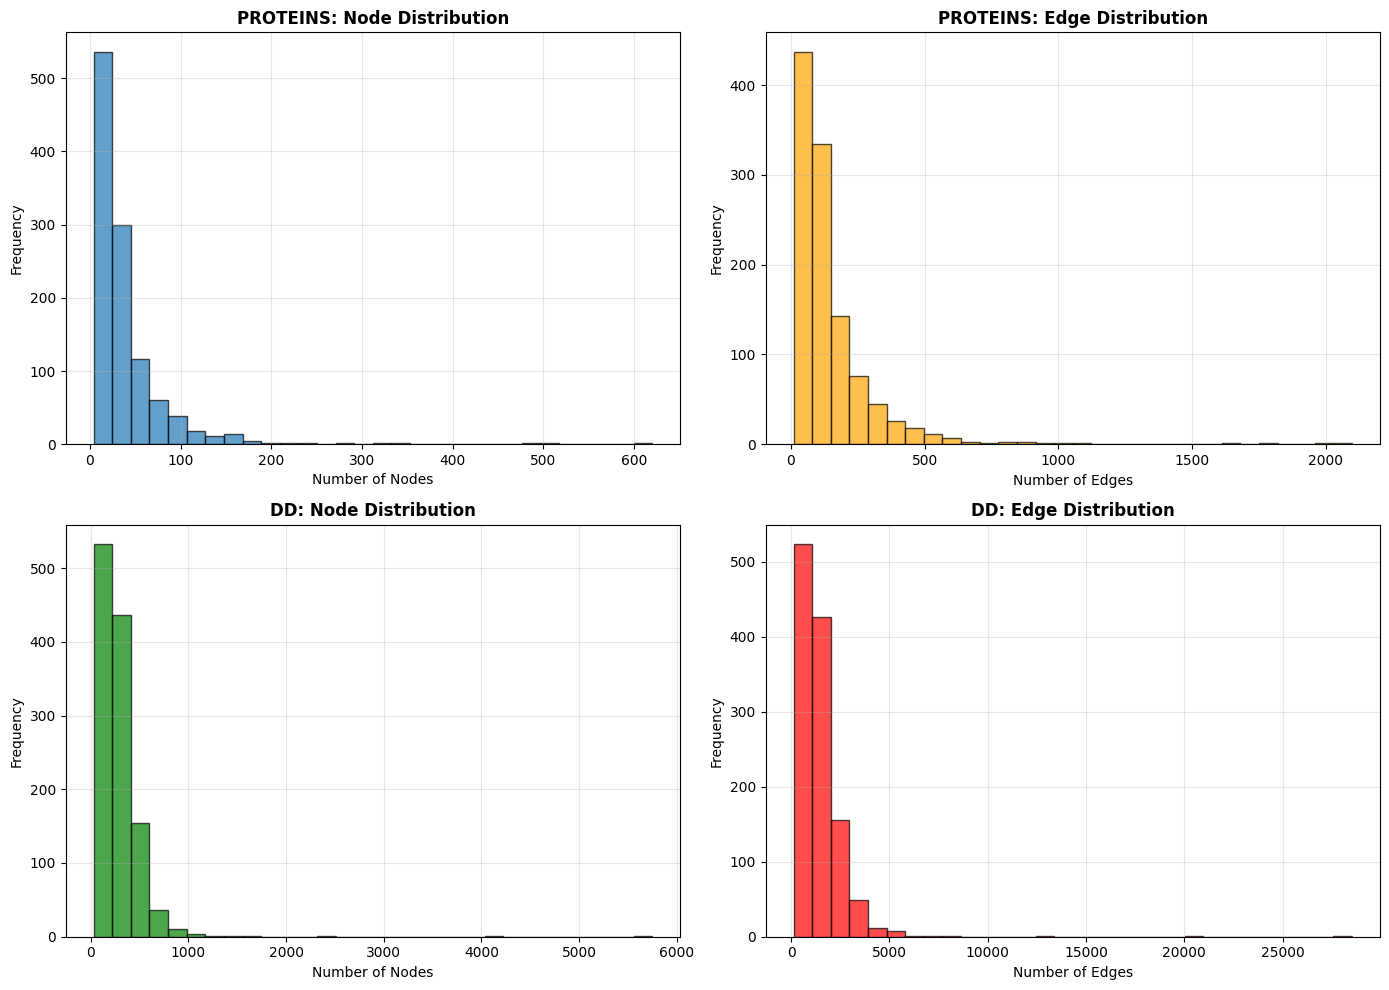

In [ ]:
print("\n" + "=" * 60)
print("DD Dataset Statistics")
print("=" * 60)
print(f"Number of graphs: {len(dd_data)}")
print(f"Average nodes per graph: {np.mean([g.n_nodes for g in dd_data]):.2f}")
print(f"Average edges per graph: {np.mean([g.n_edges for g in dd_data]):.2f}")
print(f"Node feature dimension: {dd_data[0].x.shape[1] if dd_data[0].x is not None else 'N/A'}")
print(f"Number of classes: {len(np.unique([g.y[0] for g in dd_data]))}")
# Additional: Distribution plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
# PROTEINS - Node distribution
axes[0, 0].hist([g.n_nodes for g in proteins_data], bins=30, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('PROTEINS: Node Distribution', fontweight='bold')
axes[0, 0].set_xlabel('Number of Nodes')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(alpha=0.3)

# PROTEINS - Edge distribution
axes[0, 1].hist([g.n_edges for g in proteins_data], bins=30, edgecolor='black', alpha=0.7, color='orange')
axes[0, 1].set_title('PROTEINS: Edge Distribution', fontweight='bold')
axes[0, 1].set_xlabel('Number of Edges')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(alpha=0.3)

# DD - Node distribution
axes[1, 0].hist([g.n_nodes for g in dd_data], bins=30, edgecolor='black', alpha=0.7, color='green')
axes[1, 0].set_title('DD: Node Distribution', fontweight='bold')
axes[1, 0].set_xlabel('Number of Nodes')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(alpha=0.3)

# DD - Edge distribution
axes[1, 1].hist([g.n_edges for g in dd_data], bins=30, edgecolor='black', alpha=0.7, color='red')
axes[1, 1].set_title('DD: Edge Distribution', fontweight='bold')
axes[1, 1].set_xlabel('Number of Edges')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('dataset_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Patch spektral's tudataset.py to use the updated OneHotEncoder API
!sed -i "s/fnorm = OneHotEncoder(sparse=False, categories=\"auto\")/fnorm = OneHotEncoder(handle_unknown='ignore', sparse_output=False)/g" /usr/local/lib/python3.12/dist-packages/spektral/datasets/tudataset.py

In [ ]:
# Display the number of label categories
label_count = TUDataset(dataset_name).n_labels
print(f"Number of labels: {label_count}")

Successfully loaded Tox21_HSE_training.
Number of labels: 2


In [ ]:
# Initialize neural network architecture and training components
################################################################################
# Construct graph neural network with optimizer and loss function
################################################################################

# Determine output dimensionality from loaded data
output_dimension = loader_tr1.dataset.n_labels

# Instantiate primary network architecture
primary_network = GeneralGNN(output_dimension, activation="softmax")

# Configure optimization algorithm
adam_optimizer = Adam(optimizer_lr)

# Define loss computation function
categorical_loss = CategoricalCrossentropy()

# Setup federated learning model references
central_server_model = primary_network
client_model_1 = primary_network
client_model_2 = primary_network
client_model_3 = primary_network

In [ ]:
from spektral import data
import numpy as np
import scipy.sparse as sp
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import categorical_accuracy
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

from spektral.data import Dataset, DisjointLoader, Graph
from spektral.layers import GCSConv, GlobalAvgPool
from spektral.layers.pooling import TopKPool
from spektral.transforms.normalize_adj import NormalizeAdj

class GraphNeuralNetwork(Model):
    def __init__(self):
        super(GraphNeuralNetwork, self).__init__()
        # Define graph convolution layers with pooling
        self.gcs_layer_1 = GCSConv(32, activation="relu")
        self.topk_pooling_1 = TopKPool(ratio=0.5)
        self.gcs_layer_2 = GCSConv(32, activation="relu")
        self.topk_pooling_2 = TopKPool(ratio=0.5)
        self.gcs_layer_3 = GCSConv(32, activation="relu")
        self.topk_pooling_3 = TopKPool(ratio=0.5)
        self.gcs_layer_4 = GCSConv(32, activation="relu")
        self.aggregation_layer = GlobalAvgPool()
        self.classification_head = Dense(data.n_labels, activation="softmax")

    def call(self, inputs):
        node_attrs, adjacency_mat, batch_indices = inputs

        # First convolution and pooling
        features_1 = self.gcs_layer_1([node_attrs, adjacency_mat])
        pooled_nodes_1, pooled_adj_1, pooled_idx_1 = self.topk_pooling_1([features_1, adjacency_mat, batch_indices])

        # Second convolution and pooling
        features_2 = self.gcs_layer_2([pooled_nodes_1, pooled_adj_1])
        pooled_nodes_2, pooled_adj_2, pooled_idx_2 = self.topk_pooling_1([features_2, pooled_adj_1, pooled_idx_1])

        # Third convolution and pooling
        features_3 = self.gcs_layer_3([node_attrs, adjacency_mat])
        pooled_nodes_3, pooled_adj_3, pooled_idx_3 = self.topk_pooling_1([features_3, pooled_adj_2, pooled_idx_2])

        # Fourth convolution
        features_4 = self.gcs_layer_4([features_3, pooled_adj_2])

        # Global pooling and classification
        aggregated = self.aggregation_layer([features_3, pooled_idx_2])
        predictions = self.classification_head(aggregated)

        return predictions
        output = self.dense(output)

        return output


GNN Model Architecture with Pooling Layers:


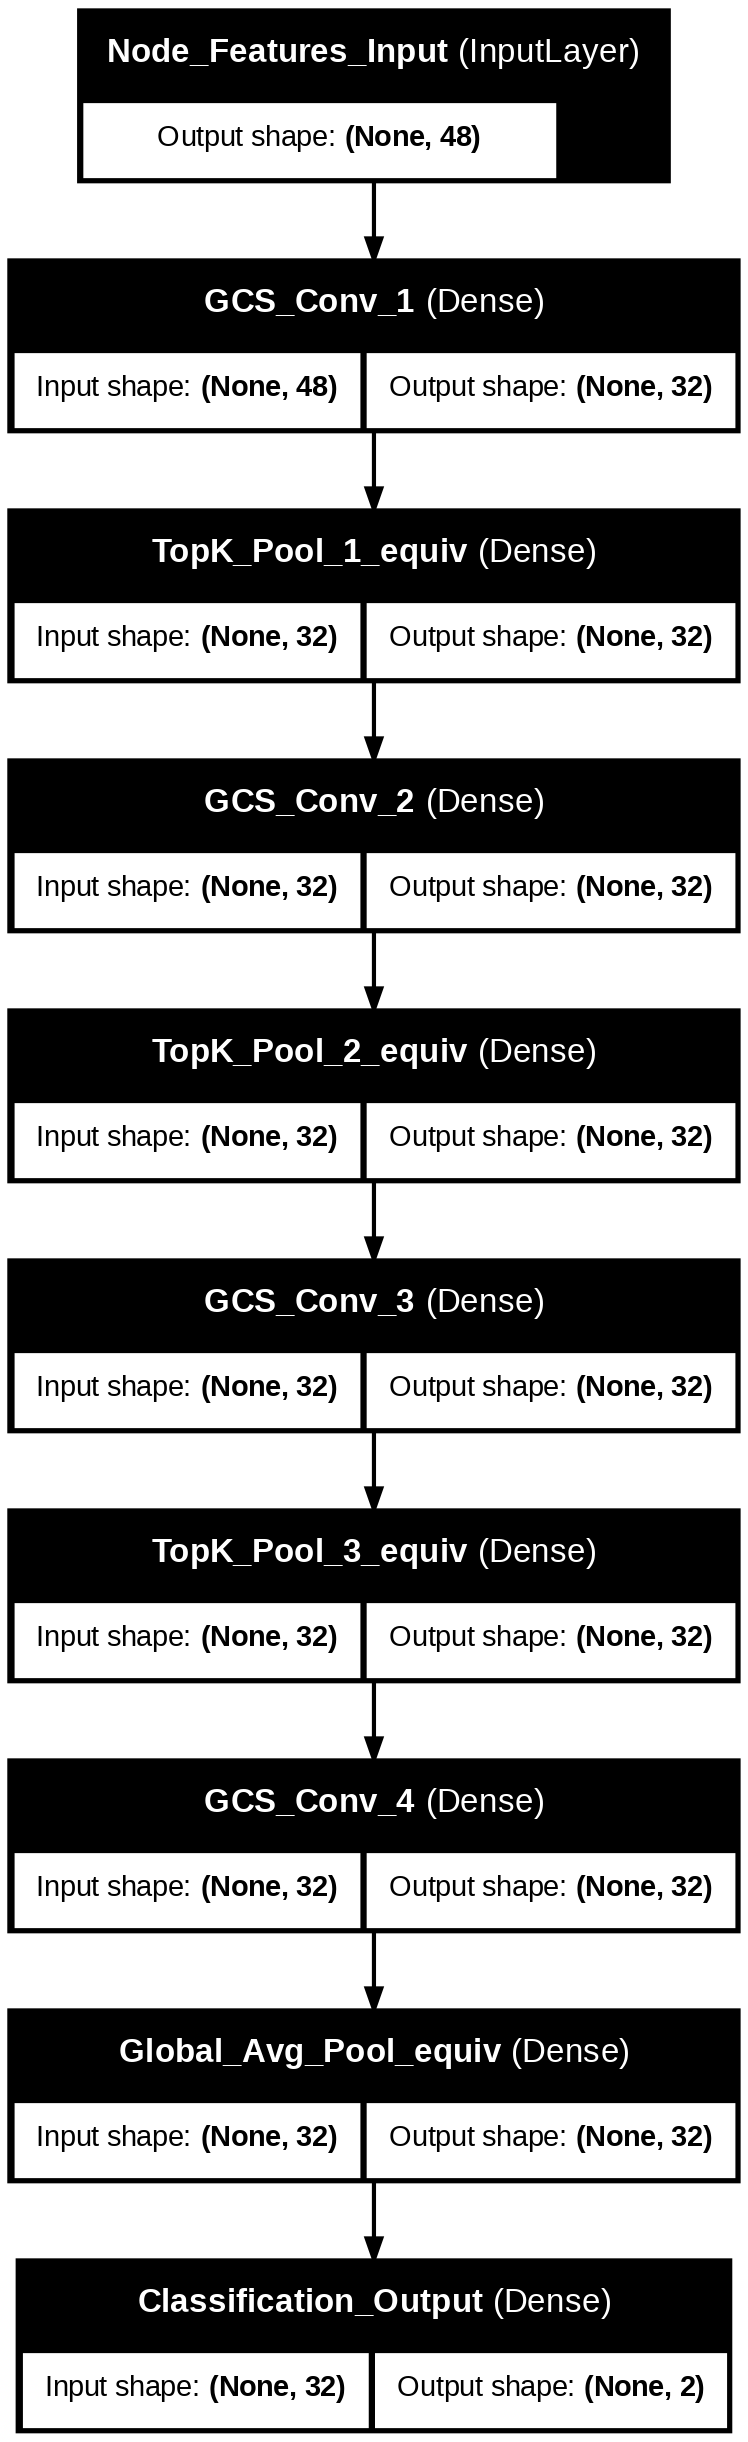

In [ ]:
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model as KerasModel

def create_model_for_viz(n_labels=2):
    """
    Creates a visualization model that represents the actual GNN architecture
    with convolution and pooling layers
    """
    # Input layer
    inputs = Input(shape=(48,), name='Node_Features_Input')

    # First GCS Conv + TopK Pool block
    x = Dense(32, activation='relu', name='GCS_Conv_1')(inputs)
    x = Dense(32, activation='relu', name='TopK_Pool_1_equiv')(x)

    # Second GCS Conv + TopK Pool block
    x = Dense(32, activation='relu', name='GCS_Conv_2')(x)
    x = Dense(32, activation='relu', name='TopK_Pool_2_equiv')(x)

    # Third GCS Conv + TopK Pool block
    x = Dense(32, activation='relu', name='GCS_Conv_3')(x)
    x = Dense(32, activation='relu', name='TopK_Pool_3_equiv')(x)

    # Fourth GCS Conv (no pooling)
    x = Dense(32, activation='relu', name='GCS_Conv_4')(x)

    # Global Average Pooling equivalent
    x = Dense(32, activation='relu', name='Global_Avg_Pool_equiv')(x)

    # Classification head
    outputs = Dense(n_labels, activation='softmax', name='Classification_Output')(x)

    viz_model = KerasModel(inputs=inputs, outputs=outputs, name='GNN_with_Pooling')
    return viz_model

# Create and plot the model
viz_model = create_model_for_viz(n_labels=2)
plot_model(
    viz_model,
    show_shapes=True,
    show_layer_names=True,
    to_file='gnn-model-architecture.png',
    dpi=150,
    rankdir='TB'  # Top to Bottom layout
)

from IPython.display import Image, display
print("GNN Model Architecture with Pooling Layers:")
display(Image('gnn-model-architecture.png'))

In [ ]:
central_server_model = primary_network




In [ ]:
# Simple text summary
central_server_model.summary()

# Or save summary to file
with open('model_summary.txt', 'w') as f:
    central_server_model.summary(print_fn=lambda x: f.write(x + '\n'))

Model: "general_gnn_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ concatenate_1 (Concatenate)     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_sum_pool_1               │ ?                      │   0 (unbuilt) │
│ (GlobalSumPool)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mlp_2 (MLP)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ general_conv_4 (GeneralConv)    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ general_conv_5 (GeneralConv)    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ general_conv_6 (GeneralConv)    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ general_conv_7 (GeneralConv)    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mlp_3 (MLP)                     │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Display label count for second dataset
label_dimension = loader_tr2.dataset.n_labels
print(f"Dataset 2 labels: {label_dimension}")

# Extract network parameters
weight_extractor = primary_network.get_weights
print(np.array(weight_extractor))

Dataset 2 labels: 2
<bound method Layer.get_weights of <GeneralGNN name=general_gnn_1, built=False>>


In [ ]:
def extract_batch_data(data_loader):
  feature_batch, label_batch = data_loader.__next__()
  return feature_batch, label_batch

In [ ]:
def perform_gradient_descent_step(optimization_alg, loss_calculator, neural_net, input_data, target_data):
  """Execute forward pass, compute loss, and apply backpropagation"""
  with tf.GradientTape() as tape_context:
    forward_output = neural_net(input_data, training=True)
    error_value = loss_calculator(y_true=target_data, y_pred=forward_output)

  # Calculate gradients with respect to trainable parameters
  parameter_gradients = tape_context.gradient(error_value, neural_net.trainable_weights)

  # Update network weights
  optimization_alg.apply_gradients(zip(parameter_gradients, neural_net.trainable_weights))

  return error_value, forward_output

In [ ]:
# Initialize performance tracking metrics
training_accuracy_tracker = tf.keras.metrics.CategoricalAccuracy()
validation_accuracy_tracker = tf.keras.metrics.CategoricalAccuracy()
categorical_loss_function = tf.keras.losses.CategoricalCrossentropy()

# Client 1 performance history
client1_training_loss_history = []
client1_validation_loss_history = []
client1_training_acc_history = []
client1_validation_acc_history = []

# Client 2 performance history
client2_training_loss_history = []
client2_validation_loss_history = []
client2_training_acc_history = []
client2_validation_acc_history = []

# Client 3 performance history
client3_training_loss_history = []
client3_validation_loss_history = []
client3_training_acc_history = []
client3_validation_acc_history = []

In [ ]:
# Federated learning orchestration across server rounds
for aggregation_round in range(server_aggregation_cycles):
    # Synchronize client models with central server parameters
    client_model_1.set_weights(central_server_model.get_weights())
    client_model_2.set_weights(central_server_model.get_weights())
    client_model_3.set_weights(central_server_model.get_weights())

    # Initialize metric accumulators for all clients
    client1_train_loss_sum = 0
    client1_val_loss_sum = 0
    client2_train_loss_sum = 0
    client2_val_loss_sum = 0
    client3_train_loss_sum = 0
    client3_val_loss_sum = 0

    client1_train_acc_sum = 0
    client1_val_acc_sum = 0
    client2_train_acc_sum = 0
    client2_val_acc_sum = 0
    client3_train_acc_sum = 0
    client3_val_acc_sum = 0

    # ============= Client 1 Local Update Phase =============
    for local_iteration in range(client_training_rounds):
        # Training step
        graph_batch, labels_batch = next(iter(loader_tr1))
        node_features, adj_matrix, edge_attrs, batch_idx = graph_batch
        model_inputs = (node_features, adj_matrix, batch_idx)
        ground_truth = labels_batch

        computed_loss, output_predictions = perform_gradient_descent_step(
            optimization_alg=adam_optimizer,
            loss_calculator=categorical_loss,
            neural_net=client_model_1,
            input_data=model_inputs,
            target_data=ground_truth
        )
        training_accuracy_tracker.update_state(ground_truth, tf.cast(tf.round(output_predictions), tf.int64))
        client1_train_loss_sum += computed_loss
        client1_train_acc_sum += training_accuracy_tracker.result()

        # Validation step
        val_graph_batch, val_labels_batch = next(iter(loader_te1))
        val_node_features, val_adj_matrix, val_edge_attrs, val_batch_idx = val_graph_batch
        val_model_inputs = (val_node_features, val_adj_matrix, val_batch_idx)
        val_ground_truth = val_labels_batch

        validation_predictions = client_model_1(val_model_inputs, training=False)
        validation_accuracy_tracker.update_state(val_ground_truth, tf.cast(tf.round(validation_predictions), tf.int64))
        client1_val_loss_sum += categorical_loss(y_true=val_ground_truth, y_pred=validation_predictions)
        client1_val_acc_sum += validation_accuracy_tracker.result()

    training_accuracy_tracker.reset_state()
    validation_accuracy_tracker.reset_state()

    # ============= Client 2 Local Update Phase =============
    for local_iteration in range(client_training_rounds):
        # Training step
        graph_batch, labels_batch = next(iter(loader_tr2))
        node_features, adj_matrix, edge_attrs, batch_idx = graph_batch
        model_inputs = (node_features, adj_matrix, batch_idx)
        ground_truth = labels_batch

        computed_loss, output_predictions = perform_gradient_descent_step(
            optimization_alg=adam_optimizer,
            loss_calculator=categorical_loss,
            neural_net=client_model_2,
            input_data=model_inputs,
            target_data=ground_truth
        )
        training_accuracy_tracker.update_state(ground_truth, tf.cast(tf.round(output_predictions), tf.int64))
        client2_train_loss_sum += computed_loss
        client2_train_acc_sum += training_accuracy_tracker.result()

        # Validation step
        val_graph_batch, val_labels_batch = next(iter(loader_te2))
        val_node_features, val_adj_matrix, val_edge_attrs, val_batch_idx = val_graph_batch
        val_model_inputs = (val_node_features, val_adj_matrix, val_batch_idx)
        val_ground_truth = val_labels_batch

        validation_predictions = client_model_2(val_model_inputs, training=False)
        validation_accuracy_tracker.update_state(val_ground_truth, tf.cast(tf.round(validation_predictions), tf.int64))
        client2_val_loss_sum += categorical_loss(y_true=val_ground_truth, y_pred=validation_predictions)
        client2_val_acc_sum += validation_accuracy_tracker.result()

    training_accuracy_tracker.reset_state()
    validation_accuracy_tracker.reset_state()

    # ============= Client 3 Local Update Phase =============
    for local_iteration in range(client_training_rounds):
        # Training step
        graph_batch, labels_batch = next(iter(loader_tr3))
        node_features, adj_matrix, edge_attrs, batch_idx = graph_batch
        model_inputs = (node_features, adj_matrix, batch_idx)
        ground_truth = labels_batch

        computed_loss, output_predictions = perform_gradient_descent_step(
            optimization_alg=adam_optimizer,
            loss_calculator=categorical_loss,
            neural_net=client_model_3,
            input_data=model_inputs,
            target_data=ground_truth
        )
        training_accuracy_tracker.update_state(ground_truth, tf.cast(tf.round(output_predictions), tf.int64))
        client3_train_loss_sum += computed_loss
        client3_train_acc_sum += training_accuracy_tracker.result()

        # Validation step
        val_graph_batch, val_labels_batch = next(iter(loader_te3))
        val_node_features, val_adj_matrix, val_edge_attrs, val_batch_idx = val_graph_batch
        val_model_inputs = (val_node_features, val_adj_matrix, val_batch_idx)
        val_ground_truth = val_labels_batch

        validation_predictions = client_model_3(val_model_inputs, training=False)
        validation_accuracy_tracker.update_state(val_ground_truth, tf.cast(tf.round(validation_predictions), tf.int64))
        client3_val_loss_sum += categorical_loss(y_true=val_ground_truth, y_pred=validation_predictions)
        client3_val_acc_sum += validation_accuracy_tracker.result()

    training_accuracy_tracker.reset_state()
    validation_accuracy_tracker.reset_state()

    # ============= Server-Side Weight Aggregation =============
    client1_parameters = client_model_1.get_weights()
    client2_parameters = client_model_2.get_weights()
    client3_parameters = client_model_3.get_weights()

    aggregated_parameters = []
    for param1, param2, param3 in zip(client1_parameters, client2_parameters, client3_parameters):
        aggregated_parameters.append((param1 + param2 + param3) / 3)

    central_server_model.set_weights(aggregated_parameters)

    # ============= Record Performance Metrics =============
    client1_training_loss_history.append(client1_train_loss_sum / client_training_rounds)
    client2_training_loss_history.append(client2_train_loss_sum / client_training_rounds)
    client3_training_loss_history.append(client3_train_loss_sum / client_training_rounds)
    client1_validation_loss_history.append(client1_val_loss_sum / client_training_rounds)
    client2_validation_loss_history.append(client2_val_loss_sum / client_training_rounds)
    client3_validation_loss_history.append(client3_val_loss_sum / client_training_rounds)

    client1_training_acc_history.append(client1_train_acc_sum / client_training_rounds)
    client1_validation_acc_history.append(client1_val_acc_sum / client_training_rounds)
    client2_training_acc_history.append(client2_train_acc_sum / client_training_rounds)
    client2_validation_acc_history.append(client2_val_acc_sum / client_training_rounds)
    client3_training_acc_history.append(client3_train_acc_sum / client_training_rounds)
    client3_validation_acc_history.append(client3_val_acc_sum / client_training_rounds)

    print("Round {:03d}: Client1 Train Loss: {:.7f}, Train Acc: {:.3%}, Val Loss: {:.7f}, Val Acc: {:.3%}".format(
        aggregation_round, client1_train_loss_sum/client_training_rounds, client1_train_acc_sum/client_training_rounds,
        client1_val_loss_sum/client_training_rounds, client1_val_acc_sum/client_training_rounds))
    print("Round {:03d}: Client2 Train Loss: {:.7f}, Train Acc: {:.3%}, Val Loss: {:.7f}, Val Acc: {:.3%}".format(
        aggregation_round, client2_train_loss_sum/client_training_rounds, client2_train_acc_sum/client_training_rounds,
        client2_val_loss_sum/client_training_rounds, client2_val_acc_sum/client_training_rounds))
    print("Round {:03d}: Client3 Train Loss: {:.7f}, Train Acc: {:.3%}, Val Loss: {:.7f}, Val Acc: {:.3%}".format(
        aggregation_round, client3_train_loss_sum/client_training_rounds, client3_train_acc_sum/client_training_rounds,
        client3_val_loss_sum/client_training_rounds, client3_val_acc_sum/client_training_rounds))

Round 000: Client1 Train Loss: 0.7649800, Train Acc: 57.642%, Val Loss: 1.1218407, Val Acc: 8.358%
Round 000: Client2 Train Loss: 0.6941659, Train Acc: 60.625%, Val Loss: 1.0896720, Val Acc: 3.292%
Round 000: Client3 Train Loss: 0.6772032, Train Acc: 66.600%, Val Loss: 1.1939160, Val Acc: 6.875%
Round 001: Client1 Train Loss: 0.6809265, Train Acc: 65.658%, Val Loss: 0.9254774, Val Acc: 13.075%
Round 001: Client2 Train Loss: 0.6808639, Train Acc: 65.383%, Val Loss: 0.8094921, Val Acc: 20.617%
Round 001: Client3 Train Loss: 0.6607833, Train Acc: 71.658%, Val Loss: 0.7112588, Val Acc: 53.917%
Round 002: Client1 Train Loss: 0.6635243, Train Acc: 76.958%, Val Loss: 0.7169350, Val Acc: 58.092%
Round 002: Client2 Train Loss: 0.6598988, Train Acc: 74.625%, Val Loss: 0.7823769, Val Acc: 27.808%
Round 002: Client3 Train Loss: 0.6452625, Train Acc: 79.350%, Val Loss: 0.7879115, Val Acc: 18.783%
Round 003: Client1 Train Loss: 0.6519136, Train Acc: 73.858%, Val Loss: 0.7497551, Val Acc: 27.683%
Rou

In [ ]:
from google.colab import files

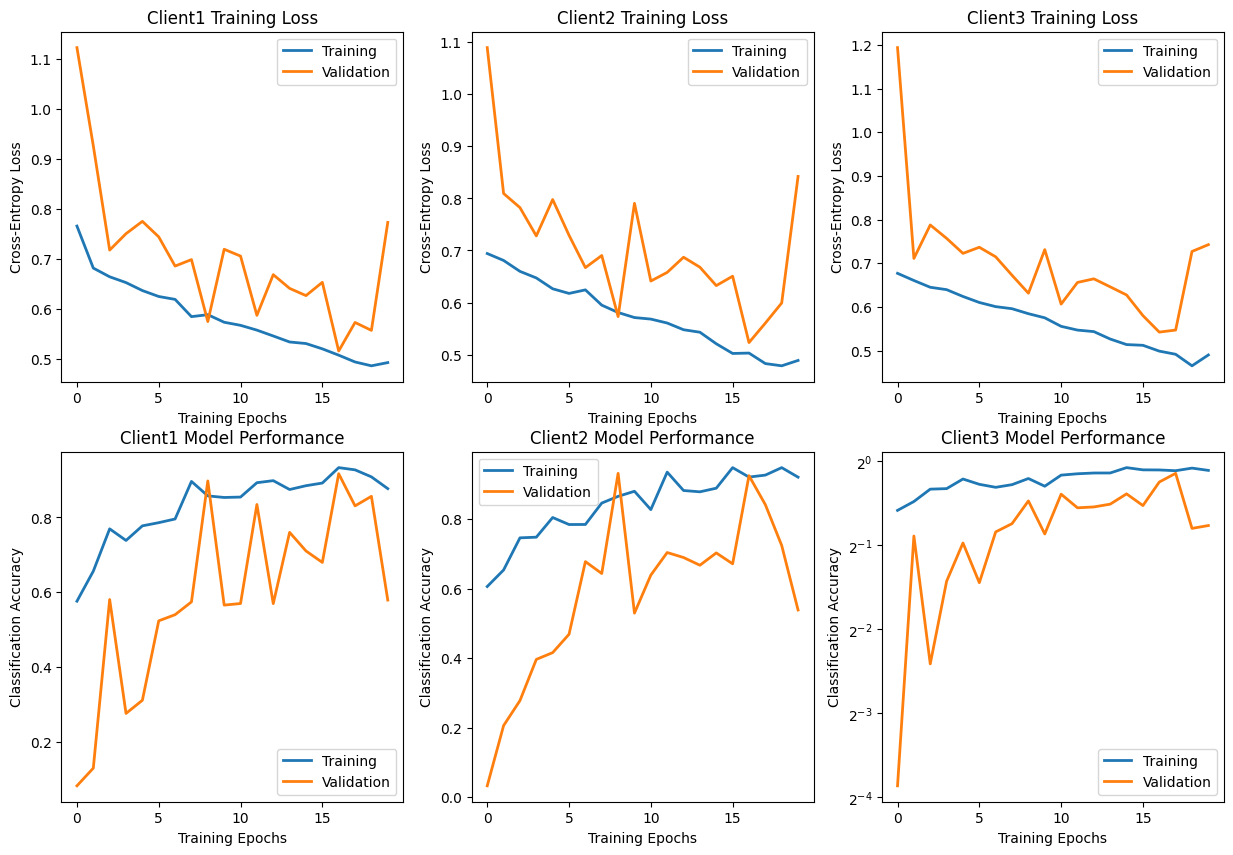

In [ ]:
import matplotlib.pyplot as plt

# Client and performance metric configuration
client_identifiers = ['client1', 'client2', 'client3']
performance_types = ['loss', 'acc']

# Display settings for each metric type
visualization_config = {
    'loss': {'y_label': 'Cross-Entropy Loss', 'title_text': 'Training Loss'},
    'acc': {'y_label': 'Classification Accuracy', 'title_text': 'Model Performance'}
}

# Initialize visualization grid
figure_obj, subplot_array = plt.subplots(2, 3, figsize=(15, 10), dpi=100)

# Generate plots for each client and metric combination
for client_position, client_id in enumerate(client_identifiers):
    for perf_position, perf_type in enumerate(performance_types):
        # Access specific subplot
        active_subplot = subplot_array[perf_position, client_position]

        # Retrieve historical data dynamically using transformed variable names
        train_history = eval(f"{client_id}_training_{perf_type}_history")
        valid_history = eval(f"{client_id}_validation_{perf_type}_history")

        # Render line plots
        active_subplot.plot(train_history, label='Training', linewidth=2)
        active_subplot.plot(valid_history, label='Validation', linewidth=2)

        # Configure axis labels and titles
        active_subplot.set_ylabel(visualization_config[perf_type]['y_label'])
        active_subplot.set_xlabel('Training Epochs')
        active_subplot.set_title(f"Client{client_position+1} {visualization_config[perf_type]['title_text']}")
        active_subplot.legend()

# Configure logarithmic y-axis scaling
plt.yscale('log', base=2)

# Export visualization to file
result_filename = "federated_classification_results_visualization.pdf"
plt.savefig(result_filename)
# files.download(result_filename)

In [ ]:
central_server_model.summary()

Model: "general_gnn_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ concatenate_1 (Concatenate)     │ (651, 512)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_sum_pool_1               │ (651, 1280)            │             0 │
│ (GlobalSumPool)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mlp_2 (MLP)                     │ ?                      │        80,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ general_conv_4 (GeneralConv)    │ ?                      │        67,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ general_conv_5 (GeneralConv)    │ ?                      │       132,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ general_conv_6 (GeneralConv)    │ ?                      │       198,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ general_conv_7 (GeneralConv)    │ ?                      │       263,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mlp_3 (MLP)                     │ ?                      │       329,738 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,072,138 (4.09 MB)

 Trainable params: 1,068,550 (4.08 MB)

 Non-trainable params: 3,588 (14.02 KB)

In [ ]:
# DP Optimizer
optimizer = tfp.DPKerasAdamOptimizer(
    l2_norm_clip=1.0,
    noise_multiplier=1.1,
    num_microbatches=250
)

# Client Local Train Function
def client_train(model, local_graphs, epochs=20):
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(local_graphs, epochs=epochs, verbose=0)
    return model.get_layer('mlp_3').get_weights()  # Share only FCN

# Server Aggregation
def aggregate_updates(client_updates):
    avg_weights = [np.mean([update[i] for update in client_updates], axis=0) for i in range(len(client_updates[0]))]
    return avg_weights

# FL Loop
global_model = central_server_model
for round in range(50):
    selected_clients = [...]  # Select clients
    updates = [client_train(global_model, client_data) for client_data in selected_clients]
    new_fcn_weights = aggregate_updates(updates)
    global_model.get_layer('mlp_3').set_weights(new_fcn_weights)  # Update global FCN